# Principal component analysis 
PCA (Principal component analysis) is a powerful tool often used in dimensionality reduction.

We will today use PCA to reduce the dimensionality of the Iris dataset from $X \in \mathbb{R}^4$ to $X' \in \mathbb{R}^2$.

In [19]:
import numpy as np
import sklearn as sk
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# plot data and fit (2d only)
def plot_fit(X, y, clf):
    """
    X = samples
    y = Ground truth
    clf = trained model
    """
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors= "black")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

In [20]:
# import some data to play with
iris = sk.datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
display(iris_df)
X = StandardScaler().fit_transform(iris_df)
target = iris.target
print ("Number of samples ::", X.shape[0])
print("Number of features ::", X.shape[1])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Number of samples :: 150
Number of features :: 4


## Dimensionality reduction.
To use PCA in practice, simply use the following function:

```{Python}
pca = PCA(n_components = n )
principalComponents = pca.fit_transform(data_to_transform)

```
Find the documentation here: [sklearn PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [21]:
# Dimensionality reduction
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

Plot the principal components and compare them to X:

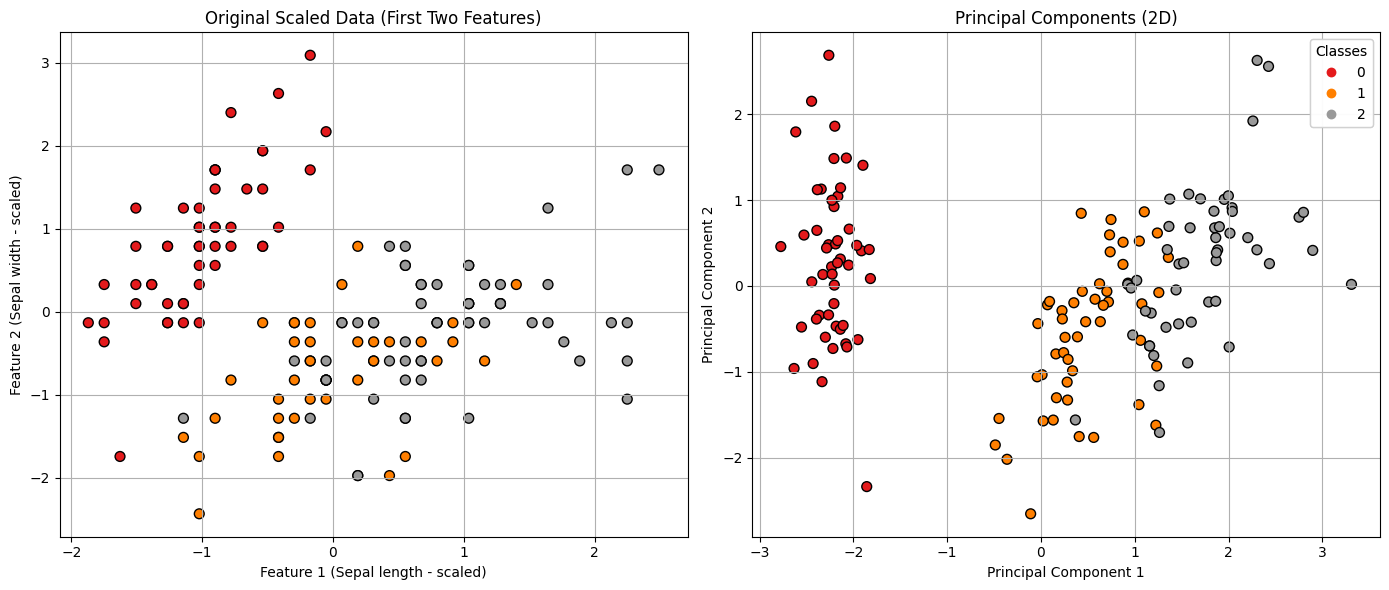

In [22]:
# Enhanced Visualization
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot original data (first two features scaled)
axs[0].scatter(X[:, 0], X[:, 1], c=target, cmap=plt.cm.Set1, edgecolor='black', s=50)
axs[0].set_title('Original Scaled Data (First Two Features)')
axs[0].set_xlabel('Feature 1 (Sepal length - scaled)')
axs[0].set_ylabel('Feature 2 (Sepal width - scaled)')
axs[0].grid(True)

# Plot principal components
scatter = axs[1].scatter(principalComponents[:, 0], principalComponents[:, 1], c=target, cmap=plt.cm.Set1, edgecolor='black', s=50)
axs[1].set_title('Principal Components (2D)')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].grid(True)

# Add a legend to the second plot
legend1 = axs[1].legend(*scatter.legend_elements(), title="Classes")
axs[1].add_artist(legend1)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

## Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. 

By using the attribute `explained_variance_ratio_`, you can see that the first principal component explains 72.77% of the variance and the second principal component explains 23.03% of the variance.

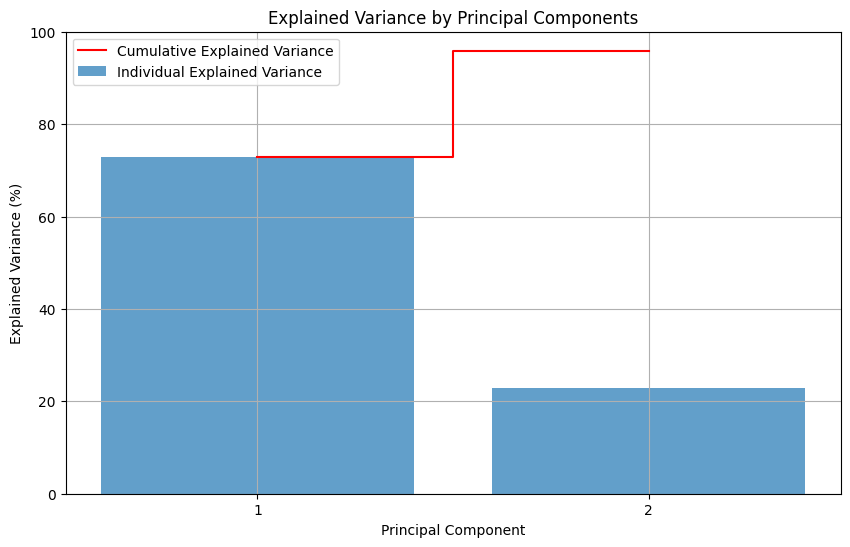

Explained variance by principal component :: [0.72962445 0.22850762]
Cumulative explained variance by principal component :: [0.72962445 0.95813207]


In [23]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Visualization of explained variance
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for individual explained variance
ax.bar(range(1, len(explained_variance) + 1), explained_variance * 100, alpha=0.7, label='Individual Explained Variance')

# Line plot for cumulative explained variance
ax.step(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, where='mid', label='Cumulative Explained Variance', color='red')

# Adding labels and title
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance (%)')
ax.set_title('Explained Variance by Principal Components')
ax.set_xticks(range(1, len(explained_variance) + 1))
ax.set_ylim(0, 100)
ax.legend(loc='best')

# Display plot
plt.grid()
plt.show()

# Print explained variance
print("Explained variance by principal component ::", explained_variance)
print("Cumulative explained variance by principal component ::", cumulative_variance)


So, in total our PCA has now expressed 96% of the variance of the dataset.
We can use these new components to attempt to fit an SVM like we did in the previous exercise. The lower dimensional data should retain most of the information in the original data and therefore should compete close to on par with a classifier trained on all features.

## Exercises
### 1) SVM
Apply an SVM to the principal components. How does it perform compared to using only two features per sample?



Training Accuracy: 0.89
Testing Accuracy: 0.89


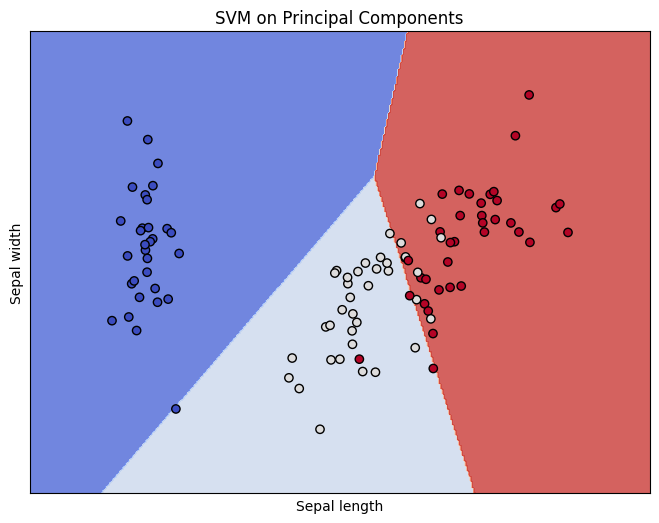

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principalComponents, target, test_size=0.3, random_state=42)

# Train the SVM model
svm_model = LinearSVC(max_iter=100000)
svm_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Plot the decision boundary
plot_fit(X_train, y_train, svm_model)
plt.title('SVM on Principal Components')
plt.show()


## 2) Three principal components
Attempt with three principal components. 
How much of the variance of the data do these express? 

Again, make a 3D plot where each point is colored respective to the predicted class from your SVM.

Explained variance with three components: [0.72962445 0.22850762 0.03668922]
Cumulative variance explained: 0.9948212908928453
Training Accuracy: 0.96
Testing Accuracy: 1.00


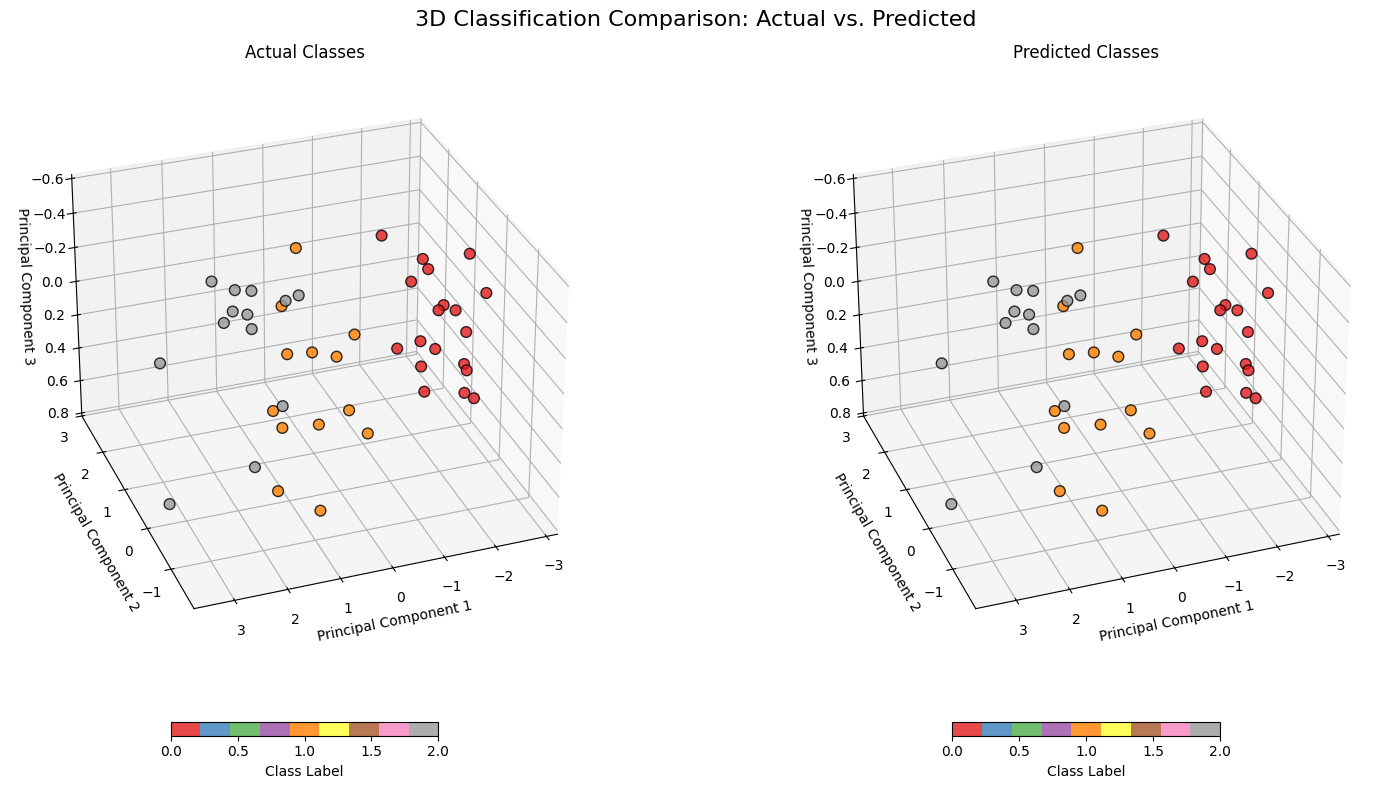

In [33]:
# PCA with three components
pca_3d = PCA(n_components=3)
principalComponents_3d = pca_3d.fit_transform(X)

# Explained variance
explained_variance_3d = pca_3d.explained_variance_ratio_
print("Explained variance with three components:", explained_variance_3d)
print("Cumulative variance explained:", np.sum(explained_variance_3d))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(principalComponents_3d, target, test_size=0.3, random_state=42)

# Train the SVM model
svm_model_3d = SVC(kernel='rbf', gamma=0.7, C=1)
svm_model_3d.fit(X_train, y_train)

# Evaluate the model
train_accuracy = svm_model_3d.score(X_train, y_train)
test_accuracy = svm_model_3d.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Train the model and make predictions
y_pred = svm_model_3d.predict(X_test)

# Improved 3D visualization with side-by-side comparison
fig = plt.figure(figsize=(16, 8))

# Plot for actual classes
ax1 = fig.add_subplot(121, projection='3d', elev=-150, azim=110)
scatter1 = ax1.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], 
                       c=y_test, cmap=plt.cm.Set1, s=60, alpha=0.8, edgecolors='k')
ax1.set_title('Actual Classes')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')

# Color bar for actual classes
cbar1 = fig.colorbar(scatter1, ax=ax1, orientation='horizontal', fraction=0.02, pad=0.1)
cbar1.set_label('Class Label')

# Plot for predicted classes
ax2 = fig.add_subplot(122, projection='3d', elev=-150, azim=110)
scatter2 = ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], 
                       c=y_pred, cmap=plt.cm.Set1, s=60, alpha=0.8, edgecolors='k')
ax2.set_title('Predicted Classes')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')

# Color bar for predicted classes
cbar2 = fig.colorbar(scatter2, ax=ax2, orientation='horizontal', fraction=0.02, pad=0.1)
cbar2.set_label('Class Label')

# Highlight mismatches between actual and predicted classes
for i in range(len(X_test)):
    if y_test[i] != y_pred[i]:
        ax2.plot([X_test[i, 0], X_test[i, 0]], 
                 [X_test[i, 1], X_test[i, 1]], 
                 [X_test[i, 2], X_test[i, 2]], 
                 'r--', alpha=0.6)  # Red dashed line for mismatches

# Overall title and layout adjustments
plt.suptitle('3D Classification Comparison: Actual vs. Predicted', fontsize=16)
plt.tight_layout()
plt.show()



## 3) Best accuracy
Compare all the different SVM's we have trained. What is the best accuracy you can acheive?. You are also allowed to use different kernels!


In [30]:
# Test different kernels
kernels = ['linear', 'rbf', 'poly']
accuracies = {}

for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1)
    svm_model.fit(X_train, y_train)
    accuracy = svm_model.score(X_test, y_test)
    accuracies[kernel] = accuracy
    print(f"{kernel.capitalize()} Kernel Accuracy: {accuracy:.2f}")

# Determine the best accuracy
best_kernel = max(accuracies, key=accuracies.get)
print(f"The best kernel is {best_kernel} with an accuracy of {accuracies[best_kernel]:.2f}")

Linear Kernel Accuracy: 0.98
Rbf Kernel Accuracy: 1.00
Poly Kernel Accuracy: 0.98
The best kernel is rbf with an accuracy of 1.00


## 4) Grid search
Attempt to perform a grid search with the function provided by `sklearn`.
The `gridsearch` function will try a lot of different combinations of parameters for your SVM so you don't have to.
```{Python}
from sklearn.model_selection import GridSearchCV
import numpy as np
    
c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}

grid = GridSearchCV(clf, param_grid = param_grid, cv = 3, n_jobs = -1, scoring = 'accuracy')
grid.fit(X_train, y_train)
```
[GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


Are you able to get a better fit?

Best Parameters: {'C': np.float64(1.0), 'gamma': np.float64(0.001), 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.95
Test Accuracy with Best Parameters: 0.98


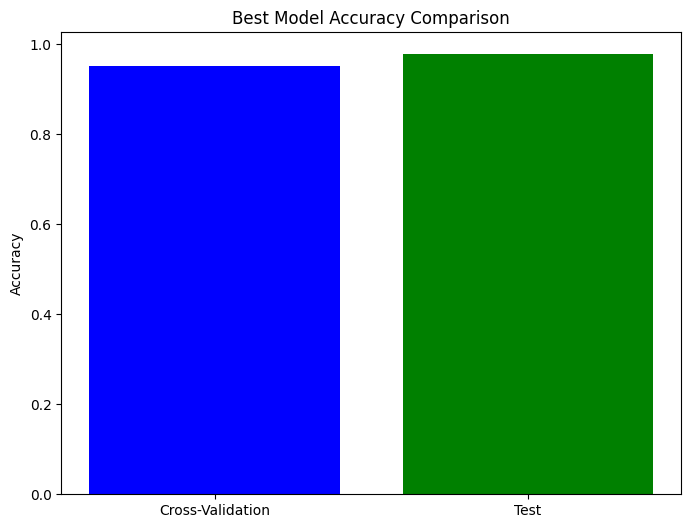

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Define a reasonable range for C and gamma
c = np.logspace(-3, 3, 7)  # Values from 0.001 to 1000
gamma = np.logspace(-3, 2, 6)  # Values from 0.001 to 100

# Parameter grid
param_grid = {
    'C': c,
    'gamma': gamma,
    'kernel': ['linear', 'rbf', 'poly']
}

# Perform the grid search
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

# Get the best parameters and accuracy
best_params = grid.best_params_
best_score = grid.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

# Train the model with the best parameters
best_model = grid.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy with Best Parameters: {test_accuracy:.2f}")

# Check if the data has exactly 2 features for 2D plotting
if X_train.shape[1] == 2:
    # Plot decision boundary for the best model
    plot_fit(X_train, y_train, best_model)
    plt.title('SVM with Best Hyperparameters')
    plt.show()
else:
    # If the data has more than 2 features, plot a bar chart of accuracies
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(['Cross-Validation', 'Test'], [best_score, test_accuracy], color=['blue', 'green'])
    ax.set_ylabel('Accuracy')
    ax.set_title('Best Model Accuracy Comparison')
    plt.show()
